## Análisis de componentes principales

In [ ]:
from pca import pca
import matplotlib.pyplot as plt

Parse data file

In [ ]:
data_file_path = "resources/europe.csv"
f = open(data_file_path)
lines = f.readlines()
data = [None]*(len(lines)-1)
countries = [None]*(len(lines)-1)
for i,line in enumerate(lines):
    if i == 0:
        continue
    data[i-1] = [float(x) for x in line.split(",")[1:]]
    countries[i-1] = line.split(",")[0]
attributes = lines[0].strip().split(",")[1:]

f.close()

Standarize data

In [48]:
model = pca( normalize=True)
results = model.fit_transform(data, col_labels=attributes, row_labels=countries)
print((results["loadings"].iloc[0]))




[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
"Area"            0.124874
"GDP"            -0.500506
"Inflation"       0.406518
"Life.expect"    -0.482873
"Military"        0.188112
"Pop.growth"     -0.475704
"Unemployment"    0.271656
Name: PC1, dtype: float64


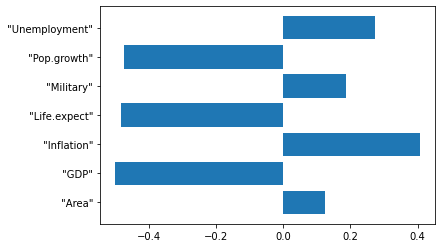

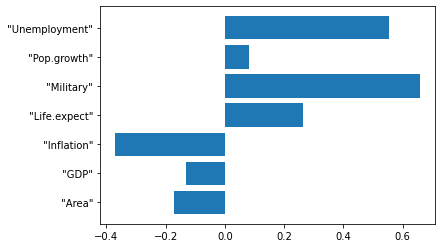

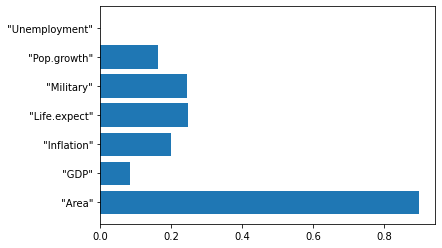

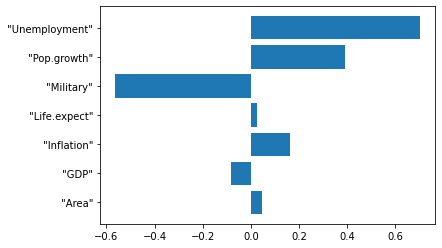

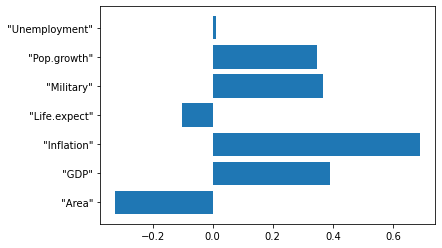

In [50]:
for i in range(len(results["loadings"])): 
    plt.figure(i)
    plt.title("PCA "+str(i+1))
    plt.barh(range(len(results["loadings"].iloc[i])), results["loadings"].iloc[i])
    plt.yticks(range(len(results["loadings"].iloc[i])), results["loadings"].columns)

Hacer grafico de barras que en y tenga el nombre de los paises y en x los valores de Y1

In [ ]:
plt.barh(range(len(results["loadings"].iloc[i])), results["loadings"].iloc[i])
plt.yticks(range(len(results["loadings"].iloc[i])), results["loadings"].columns)

In [ ]:
model.plot()
model.scatter(legend=False, gradient='#FFFFFF')
model.biplot(legend=False, label=True)

![Mapa de europa](./european-map.jpg)